In [148]:
!pip install scikeras

# IMPORTING THE PACKAGES FOR THE TRAINING

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, LeakyReLU,ELU
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pickle
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report






In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset from the google drive

In [151]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI/CustomerChurn_dataset.csv')

loaded data for EDA


In [152]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI/CustomerChurn_dataset.csv')

In [153]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA PREPROCESSING

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [155]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df = df.drop('customerID', axis=1)
df = df.dropna(subset=['TotalCharges'])

In [156]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [158]:
# Print the unique categories in the  column
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [159]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [160]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)


In [161]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Lable Encoding

In [162]:

binary_variables = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','PaperlessBilling','Churn']
label_encoder = LabelEncoder()
for column in binary_variables:
  df[column] = label_encoder.fit_transform(df[column])


In [163]:
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [164]:
multiclass_variables = ['InternetService','PaymentMethod','Contract']
df = pd.get_dummies(df,columns = multiclass_variables,drop_first = True)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [166]:
scaler = StandardScaler()
numeric_variables = ['tenure','MonthlyCharges','TotalCharges']
df[numeric_variables] = scaler.fit_transform(df[numeric_variables])

In [167]:
with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [168]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0,1,0,-1.280248,0,0,0,1,0,...,-1.161694,-0.994194,0,0,0,0,1,0,0,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,-0.260878,-0.173740,0,0,0,0,0,1,1,0
2,1,0,0,0,-1.239504,1,0,1,1,0,...,-0.363923,-0.959649,1,0,0,0,0,1,0,0
3,1,0,0,0,0.512486,0,0,1,0,1,...,-0.747850,-0.195248,0,0,0,0,0,0,1,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,1,1,0,1,...,0.664868,-0.129180,0,0,0,0,0,1,1,0
7039,0,0,1,1,1.612573,1,1,0,1,1,...,1.276493,2.241056,0,1,0,1,0,0,1,0
7040,0,0,1,1,-0.872808,0,0,1,0,0,...,-1.170004,-0.854514,0,0,0,0,1,0,0,0
7041,1,1,1,0,-1.158016,1,1,0,0,0,...,0.319168,-0.872095,1,1,0,0,0,1,0,0


# **FEATURE SELECTION**

In [169]:
correlation_matrix = df.corr()
correlation = correlation_matrix['Churn'].abs().sort_values(ascending=False)
top_features = correlation[1:11]
top_features

tenure                            0.354049
InternetService_Fiber optic       0.307463
Contract_Two year                 0.301552
PaymentMethod_Electronic check    0.301455
InternetService_No                0.227578
TotalCharges                      0.199484
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
Contract_One year                 0.178225
OnlineSecurity                    0.171270
Name: Churn, dtype: float64

In [170]:
y = df['Churn']
X = df.drop(columns=['Churn'])

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

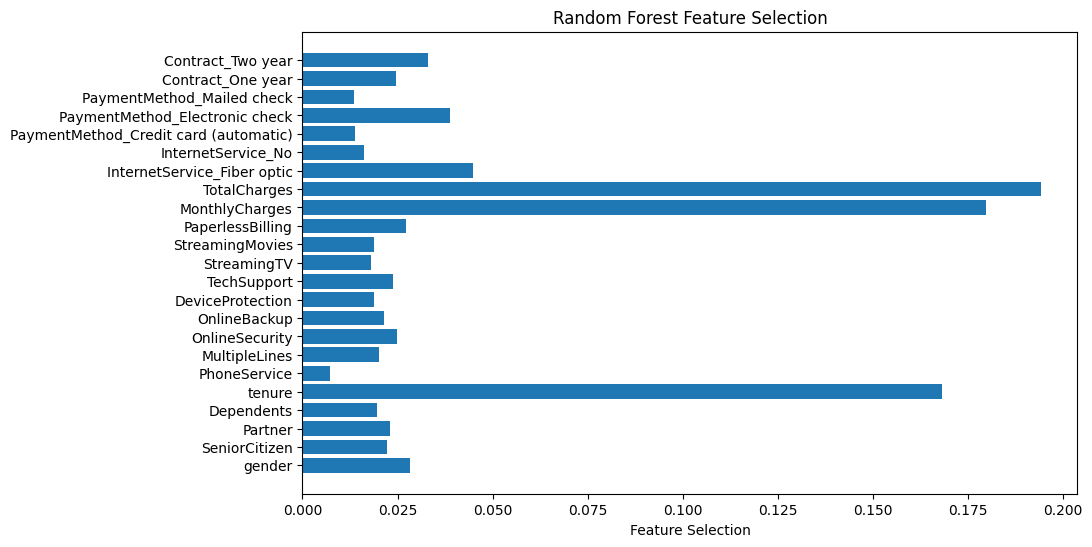

,Feature,Importance
15,TotalCharges,0.194066
14,MonthlyCharges,0.179634
4,tenure,0.168059
16,InternetService_Fiber optic,0.044722
19,PaymentMethod_Electronic check,0.038909
22,Contract_Two year,0.032981
0,gender,0.028177
13,PaperlessBilling,0.027348
7,OnlineSecurity,0.024799
21,Contract_One year,0.024543


In [172]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Select the top 16 features
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xlabel('Feature Selection')
plt.title('Random Forest Feature Selection')
plt.show()
top_features

In [173]:
top_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'InternetService_Fiber optic',
                'Contract_Two year', 'PaymentMethod_Electronic check', 'gender', 'PaperlessBilling',
                'Partner', 'OnlineSecurity', 'Contract_One year', 'TechSupport', 'OnlineBackup',
                'SeniorCitizen', 'Dependents']


# **EDA**

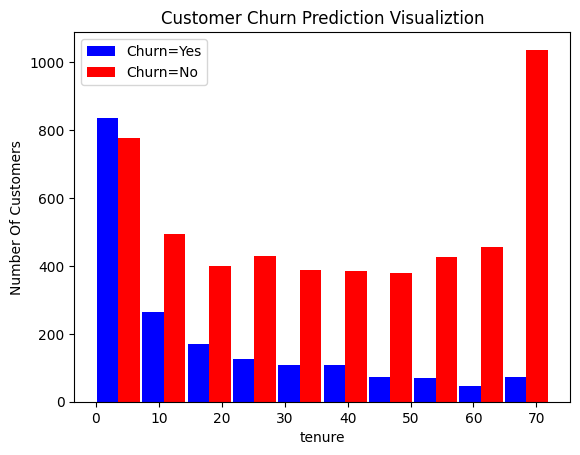

In [174]:
data[data.Churn=='No']
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

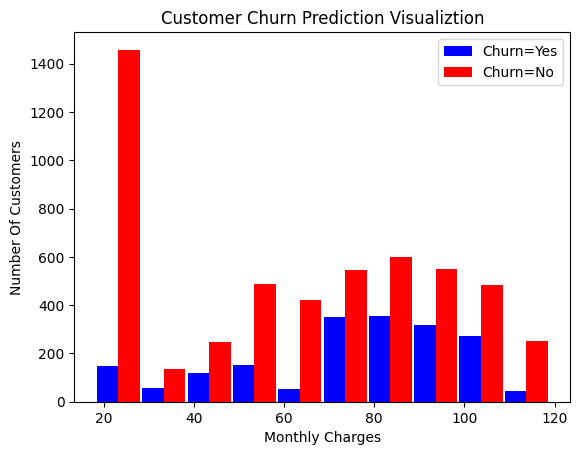

In [175]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

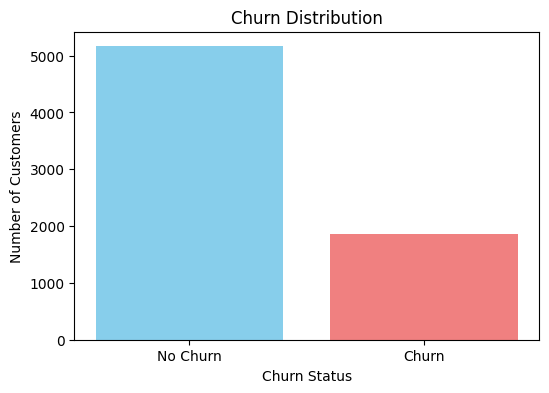

In [176]:
churn_counts = df['Churn'].value_counts()

# Create a bar chart to visualize the churn distribution
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [177]:
paymentmethod_data = data.groupby("PaymentMethod").count()[["gender","Churn"]]
paymentmethod_data

,gender,Churn
PaymentMethod,,
Bank transfer (automatic),1544,1544
Credit card (automatic),1522,1522
Electronic check,2365,2365
Mailed check,1612,1612


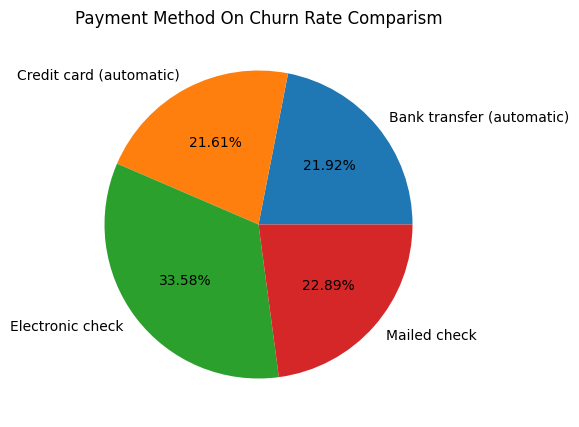

In [178]:
plt.figure(figsize=(7, 5))
plt.pie(x="Churn", data =paymentmethod_data, autopct="%1.2f%%", labels=paymentmethod_data.index)
plt.title("Payment Method On Churn Rate Comparism")
plt.show()

# **MODEL TRAINING**

In [179]:
X = df[top_features]
y = df['Churn']

In [180]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [194]:
y_train

6030    1
3410    1
5483    1
5524    0
6337    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 5625, dtype: int64

In [198]:
scalerx = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

,TotalCharges,MonthlyCharges,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,gender,PaperlessBilling,Partner,OnlineSecurity,Contract_One year,TechSupport,OnlineBackup,SeniorCitizen,Dependents
5157,-0.515506,0.114739,-0.669089,0,1,0,0,0,1,1,0,1,1,0,1
84,-0.577934,-1.484126,0.675462,0,1,0,0,1,1,0,0,0,0,0,0
4026,2.547968,1.645462,1.612573,1,1,0,1,1,1,1,0,1,1,0,1
2860,2.010822,1.216660,1.408853,1,0,0,1,1,0,0,0,0,0,1,0
5225,2.283454,1.318043,1.612573,1,0,0,1,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,-0.998937,-1.519029,-1.280248,0,0,0,1,0,0,0,0,0,0,0,0
6505,0.518020,-0.166143,0.960670,0,1,0,1,1,1,1,0,0,1,0,1
4167,0.702767,0.362380,0.716206,0,0,0,0,0,1,0,1,0,0,0,0
3340,-0.810572,0.610022,-1.117272,1,0,0,0,1,0,0,0,0,0,1,0


In [182]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scalerx, scaler_file)

# **TRAINING**

In [183]:
# Define the MLP model using the Functional API
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer1_dropout = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1_dropout)
hidden_layer2_dropout = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16, activation='relu')(hidden_layer2_dropout)
hidden_layer3_dropout = Dropout(0.5)(hidden_layer3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer3_dropout)



model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.5706 - accuracy: 0.7029 - val_loss: 0.4430 - val_accuracy: 0.7511
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.5000 - accuracy: 0.7499 - val_loss: 0.4241 - val_accuracy: 0.7937
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4858 - accuracy: 0.7593 - val_loss: 0.4214 - val_accuracy: 0.7937
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4703 - accuracy: 0.7753 - val_loss: 0.4163 - val_accuracy: 0.7937
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4741 - accuracy: 0.7689 - val_loss: 0.4160 - val_accuracy: 0.7937
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4615 - accuracy: 0.7803 - val_loss: 0.4178 - val_accuracy: 0.7994
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4533 - accuracy: 0.7765 - val_loss: 0.4131 - val_accuracy: 0.7966

In [184]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

176/176 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8215
Training Loss: 0.3843, Training Accuracy: 0.8215
22/22 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8065
Validation Loss: 0.4137, Validation Accuracy: 0.8065


In [185]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

22/22 [==============================] - 0s 14ms/step - loss: 0.4743 - accuracy: 0.7727
Test Loss: 0.4743, Testing Accuracy: 0.7727


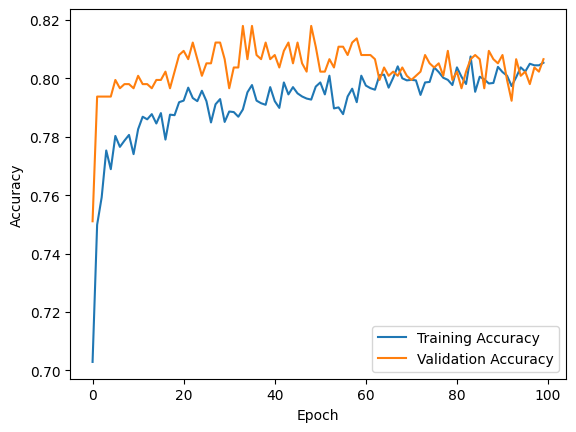

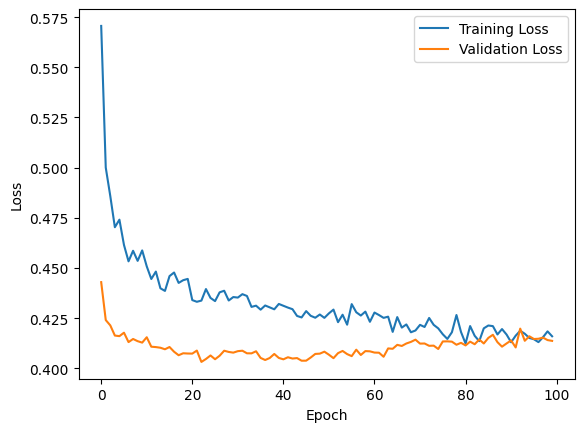

In [186]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()





# **GRID SEARCH**

In [187]:
def create_model(activation='relu', dropout_rate=0.5):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer1_dropout = Dropout(dropout_rate)(hidden_layer1)

    hidden_layer2 = Dense(32, activation=activation)(hidden_layer1_dropout)
    hidden_layer2_dropout = Dropout(dropout_rate)(hidden_layer2)

    hidden_layer3 = Dense(16, activation=activation)(hidden_layer2_dropout)
    hidden_layer3_dropout = Dropout(dropout_rate)(hidden_layer3)

    output_layer = Dense(1, activation='sigmoid')(hidden_layer3_dropout)
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'batch_size': [25, 32, 50, 64],
    'epochs': [20,25,28,32,50, 100],
    'dropout_rate': [0.2, 0.5],
    'verbose': [0]
}

# Create the MLP classifier using KerasClassifier with the create_model function
mlp = KerasClassifier(build_fn=create_model, verbose=0, dropout_rate=0.2)

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_search_result.best_params_)
print("Best accuracy found: ", grid_search_result.best_score_)

# Train the final model with the best hyperparameters on the entire training set
best_params = grid_search_result.best_params_
final_model = create_model(dropout_rate=best_params['dropout_rate'])
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)
final_model.save("finalmodel.h5")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best parameters found:  {'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 25, 'verbose': 0}
Best accuracy found:  0.8024888888888889
Epoch 1/25
88/88 [==============================] - 2s 6ms/step - loss: 0.5189 - accuracy: 0.7435
Epoch 2/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.7902
Epoch 3/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.7948
Epoch 4/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.7973
Epoch 5/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.7959
Epoch 6/25
88/88 [==============================] - 1s 6ms/step - loss: 0.4264 - accuracy: 0.7982
Epoch 7/25
88/88 [==============================] - 1s 6ms/step - loss: 0.4252 - accuracy: 0.8027
Epoch 8/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.8011
Epoch 9/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4268 - ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [188]:
# Evaluate the model on the validation set
val_loss, val_accuracy = final_model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)



22/22 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8108
Validation Loss:  0.40870481729507446
Validation Accuracy:  0.8108108043670654
22/22 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7812
Test Loss:  0.47283875942230225
Test Accuracy:  0.78125


In [189]:
# Evaluate the model on the test set
test_predictions = final_model.predict(X_test)
# Evaluate the model on the test set and extract the probability for the positive class
test_predictions_proba = final_model.predict(X_test)[:, 0]

# Calculate accuracy
test_accuracy = accuracy_score(y_test, (test_predictions > 0.5).astype(int))
print("Test Accuracy: ", test_accuracy)

# Calculate AUC score
test_auc_score = roc_auc_score(y_test, test_predictions_proba)
print("Test AUC Score: ", test_auc_score)


22/22 [==============================] - 0s 2ms/step
Test Accuracy:  0.78125
Test AUC Score:  0.8080999054679339


In [190]:

# Evaluate the model on the validation set
val_predictions = final_model.predict(X_val)
val_predictions_proba = final_model.predict(X_val)

# Assuming final_model has only one output layer
if val_predictions_proba.shape[1] == 1:
    # For binary classification, use the predicted probabilities for the positive class
    val_predictions_proba = val_predictions_proba[:, 0]

# Calculate accuracy
val_accuracy = accuracy_score(y_val, (val_predictions > 0.5).astype(int))
print("Validation Accuracy: ", val_accuracy)

# Calculate AUC score
val_auc_score = roc_auc_score(y_val, val_predictions_proba)
print("Validation AUC Score: ", val_auc_score)



22/22 [==============================] - 0s 2ms/step
Validation Accuracy:  0.8108108108108109
Validation AUC Score:  0.8427543290043291


In [191]:
# predict the churn values
Y_pred = model.predict(X_test)
#print(Y_pred)
# unscaling the ypred values
Y_pred_lis = []
for i in Y_pred:
    if i>0.5:
        Y_pred_lis.append(1)
    else:
        Y_pred_lis.append(0)
#print(Y_pred_lis)

22/22 [==============================] - 0s 2ms/step


In [192]:
data = {'orignal_churn':y_test, 'predicted_churn':Y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
5157,0,0
84,0,0
4026,0,0
2860,0,0
5225,0,0
1503,0,0
5375,1,1
5056,0,0
4582,0,0
1321,0,0


# **CONFUSION MATRIX**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       505
           1       0.60      0.60      0.60       199

    accuracy                           0.77       704
   macro avg       0.72      0.72      0.72       704
weighted avg       0.77      0.77      0.77       704



Text(183.22222222222223, 0.5, 'True Number')

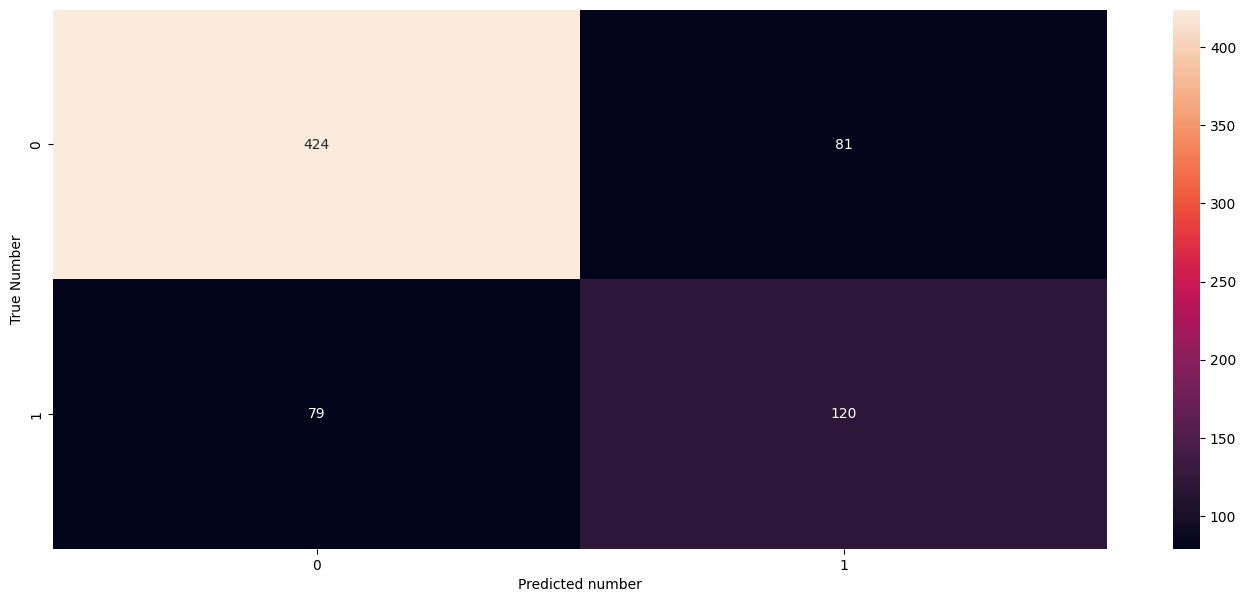

In [193]:
# checking for performance metrices
import seaborn as sb

print(classification_report(y_test,Y_pred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=Y_pred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted number')
plt.ylabel('True Number')